In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [2]:
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

In [3]:
X[0:5]

array([13.,  2., 14., 23., 13.])

In [4]:
Y[0:5]

array([33., 16., 32., 51., 27.])

In [ ]:
sns.set()

[0, 50, 0, 50]

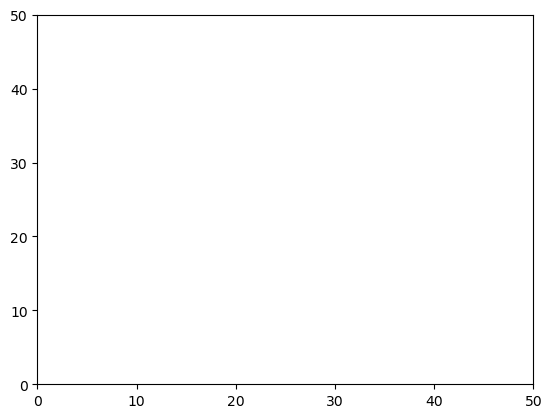

In [6]:
plt.axis([0, 50, 0, 50])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

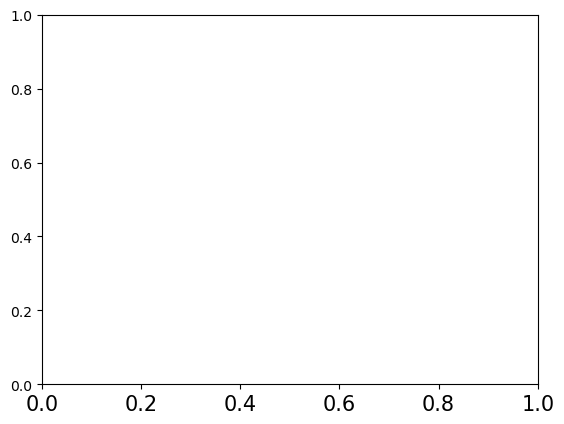

In [7]:
plt.xticks(fontsize=15)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

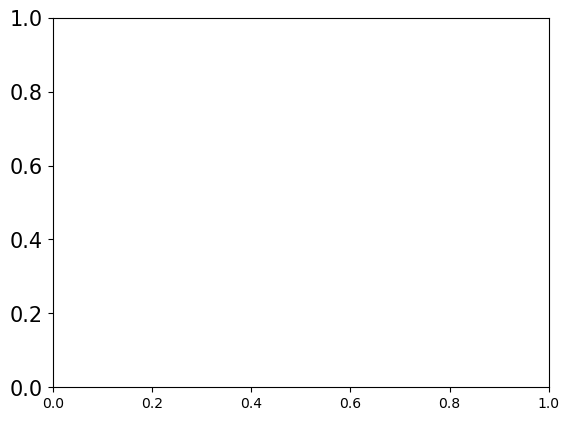

In [8]:
plt.yticks(fontsize=15)

Text(0.5, 0, 'Reservations')

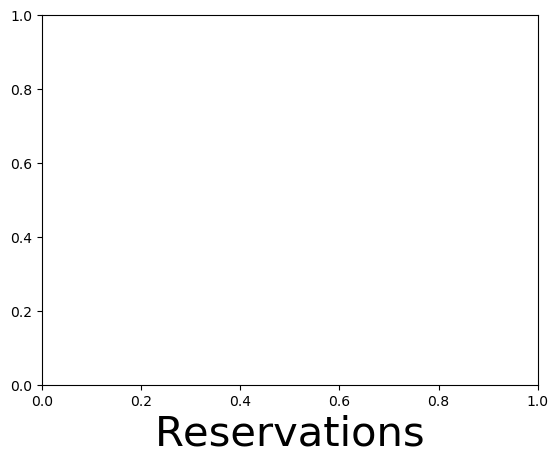

In [9]:
plt.xlabel("Reservations", fontsize=30)

Text(0, 0.5, 'Pizzas')

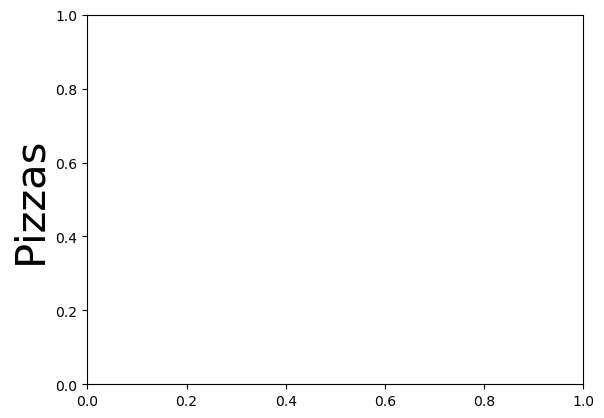

In [10]:
plt.ylabel("Pizzas", fontsize=30)

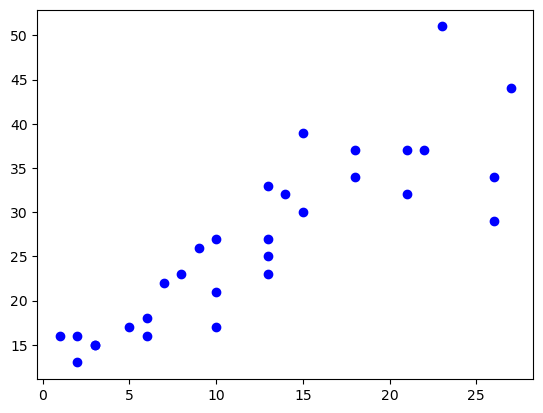

In [11]:
plt.plot(X, Y, 'bo')

In [12]:
plt.show()

In [12]:
def predict(X, w):
    return X * w 

In [13]:
def loss(X, Y, w):
    return np.average((predict(X, w) - Y) ** 2)

In [17]:
def train(X, Y, iterations, lr):
    w = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w + lr) < current_loss:
            w += lr
        elif loss(X, Y, w - lr) < current_loss:
            w -= lr
        else:
            return w
    raise Exception("Couldn't converge within %d iterations" % iterations)        
  

In [18]:
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

In [19]:
# train the syatem
w = train(X, Y, iterations=10000, lr=0.01)
print("\nw=%.3f" % w)

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

In [21]:
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w)))

Prediction: x=20 => y=36.80


In [26]:
import numpy as np

def predict(X, w, b):
    return X * w + b

def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)

def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        else:
            return w, b
    raise Exception("Couldn't converge within %d iterations" % iterations) 

# Import the dataset
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

# train the system
w, b = train(X, Y, iterations=10000, lr=0.01)
print("\nw=%.3f, b=%.3f" % (w, b))

# predict the number of pizzas
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))
            

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

In [27]:
def gradient(X, Y, w):
    return 2 * np.average(X * (predict(X, w, 0) - Y))

In [28]:
def train(X, Y, iterations, lr):
    w = 0
    for i in range(iterations):
        print("Iteration %4d => Loss: %.10f" % (i, loss(X, Y, w, 0)))
        w -= gradient(X, Y, w) * lr
    return w    

In [31]:
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)
w = train(X, Y, iterations=100, lr=0.001)
print("\nw=%.10f"  % w)

Iteration    0 => Loss: 812.8666666667
Iteration    1 => Loss: 304.3630879787
Iteration    2 => Loss: 143.5265791020
Iteration    3 => Loss: 92.6549949641
Iteration    4 => Loss: 76.5646303400
Iteration    5 => Loss: 71.4753484132
Iteration    6 => Loss: 69.8656402969
Iteration    7 => Loss: 69.3564996643
Iteration    8 => Loss: 69.1954616593
Iteration    9 => Loss: 69.1445263431
Iteration   10 => Loss: 69.1284158205
Iteration   11 => Loss: 69.1233201627
Iteration   12 => Loss: 69.1217084379
Iteration   13 => Loss: 69.1211986595
Iteration   14 => Loss: 69.1210374197
Iteration   15 => Loss: 69.1209864206
Iteration   16 => Loss: 69.1209702899
Iteration   17 => Loss: 69.1209651878
Iteration   18 => Loss: 69.1209635741
Iteration   19 => Loss: 69.1209630637
Iteration   20 => Loss: 69.1209629022
Iteration   21 => Loss: 69.1209628512
Iteration   22 => Loss: 69.1209628350
Iteration   23 => Loss: 69.1209628299
Iteration   24 => Loss: 69.1209628283
Iteration   25 => Loss: 69.1209628278
Iteration

In [32]:
def gradient(X, Y, w, b):
    w_gradient = 2 * np.average(X * (predict(X, w, b) - Y))
    b_gradient = 2 * np.average(predict(X, w, b) - Y)
    return (w_gradient, b_gradient)

def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        print("Iteration %4d => Loss: %.10f" % (i, loss(X, Y, w, b)))
        w_gradient, b_gradient = gradient(X, Y, w, b)
        w -= w_gradient * lr
        b -= b_gradient * lr
    return w, b

X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)
w, b = train(X, Y, iterations=20000, lr=0.001)
print("\nw=%.10f, b=%.10d" % (w, b))
print("PredictionL x=%d => y=%.2f" % (20, predict(20, w, b)))
    

Iteration    0 => Loss: 812.8666666667
Iteration    1 => Loss: 302.5769561564
Iteration    2 => Loss: 141.9840903267
Iteration    3 => Loss: 91.4213766211
Iteration    4 => Loss: 75.4790576522
Iteration    5 => Loss: 70.4298834852
Iteration    6 => Loss: 68.8082102709
Iteration    7 => Loss: 68.2650157314
Iteration    8 => Loss: 68.0611933727
Iteration    9 => Loss: 67.9641875162
Iteration   10 => Loss: 67.9008258073
Iteration   11 => Loss: 67.8480849450
Iteration   12 => Loss: 67.7987207420
Iteration   13 => Loss: 67.7504538190
Iteration   14 => Loss: 67.7025669451
Iteration   15 => Loss: 67.6548344110
Iteration   16 => Loss: 67.6071851614
Iteration   17 => Loss: 67.5595968023
Iteration   18 => Loss: 67.5120622506
Iteration   19 => Loss: 67.4645792410
Iteration   20 => Loss: 67.4171470238
Iteration   21 => Loss: 67.3697653264
Iteration   22 => Loss: 67.3224340264
Iteration   23 => Loss: 67.2751530484
Iteration   24 => Loss: 67.2279223323
Iteration   25 => Loss: 67.1807418223
Iteration